In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
file1 = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
file1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
file1.shape

(9134, 24)

In [5]:
cols = []
for i in range (len(file1.columns)):
    cols.append(file1.columns[i].lower().replace(" ","_"))

In [6]:
file1.columns = cols

In [7]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
file1.select_dtypes('object')

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [9]:
file1.select_dtypes('number')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [10]:
file1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [11]:
file1.isna().sum()/len(file1)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

In [12]:
null_file1 = pd.DataFrame(round(file1.isna().sum()/len(file1),4)*100)

In [13]:
null_file1.head()

,0
customer,0.0
state,0.0
customer_lifetime_value,0.0
response,0.0
coverage,0.0


In [14]:
null_file1 = null_file1.reset_index()
null_file1.columns = ['header','percentage_nulls']
null_file1

,header,percentage_nulls
0,customer,0.0
1,state,0.0
2,customer_lifetime_value,0.0
3,response,0.0
4,coverage,0.0
5,education,0.0
6,effective_to_date,0.0
7,employmentstatus,0.0
8,gender,0.0
9,income,0.0


In [15]:
columns_drop = null_file1[null_file1['percentage_nulls']>3]['header']

In [16]:
print(columns_drop.values)

[]


In [17]:
file1 = file1.drop(columns_drop,axis=1)

In [18]:
file1.shape

(9134, 24)

In [19]:
file1['effective_to_date'] = pd.to_datetime(file1['effective_to_date'], errors='coerce')

In [20]:
print("Month:",file1['effective_to_date'][0].month)

Month: 2


In [21]:
file1['first_quarter'] = pd.DatetimeIndex(file1['effective_to_date']).month
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,first_quarter
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [22]:
print(file1['first_quarter'].unique())

[2 1]


In [23]:
file1.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,first_quarter
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [24]:
file1.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [25]:
O_file = file1.select_dtypes('object')

In [26]:
N_file = file1.select_dtypes('number')

In [27]:
CM = N_file.corr()
CM

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.006096
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.000169
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.011467
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.020921
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.011010
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.006335
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,0.009305
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,0.006820
first_quarter,-0.006096,0.000169,0.011467,-0.020921,0.011010,-0.006335,0.009305,0.006820,1.000000


In [28]:
CM.describe().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,0.18,0.07,0.22,0.11,0.11,0.10,0.11,0.17,0.11
std,0.34,0.37,0.37,0.34,0.33,0.34,0.33,0.41,0.33
min,-0.04,-0.36,-0.02,-0.04,-0.04,-0.04,-0.01,-0.36,-0.02
25%,0.01,-0.02,-0.01,-0.02,-0.00,-0.01,-0.01,-0.00,-0.01
50%,0.02,-0.00,0.01,0.01,0.00,-0.00,0.00,0.01,0.01
75%,0.23,0.01,0.40,0.01,0.01,0.01,0.01,0.23,0.01
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


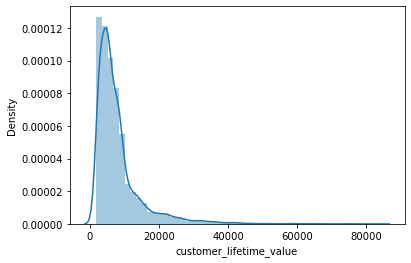

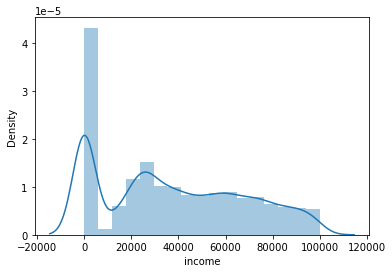

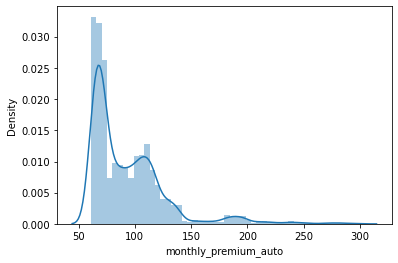

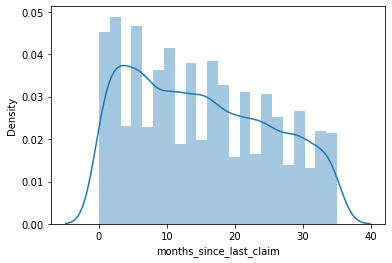

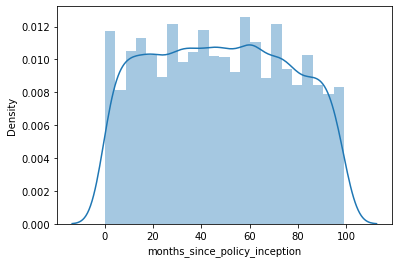

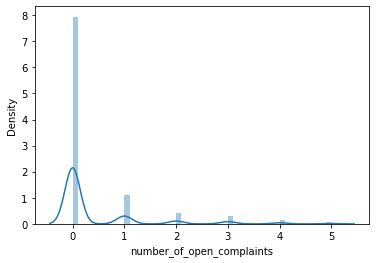

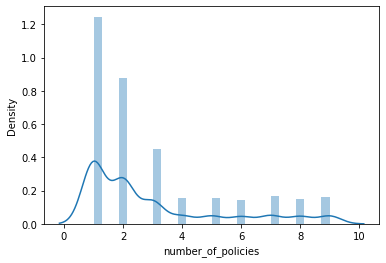

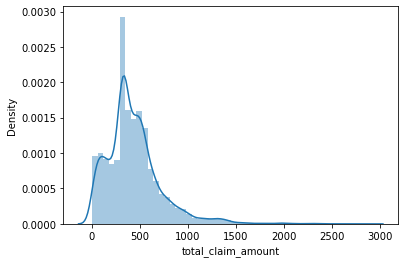

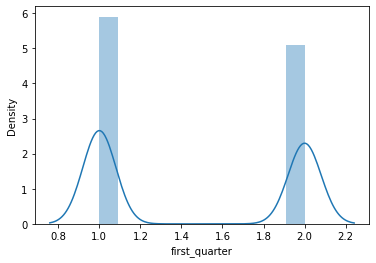

In [29]:
for column in CM.columns:
    sns.distplot(N_file[column])
    plt.show()

In [30]:
N_file.corr().apply(lambda x: round(x,2))

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
customer_lifetime_value,1.00,0.02,0.40,0.01,0.01,-0.04,0.02,0.23,-0.01
income,0.02,1.00,-0.02,-0.03,-0.00,0.01,-0.01,-0.36,0.00
monthly_premium_auto,0.40,-0.02,1.00,0.01,0.02,-0.01,-0.01,0.63,0.01
months_since_last_claim,0.01,-0.03,0.01,1.00,-0.04,0.01,0.01,0.01,-0.02
months_since_policy_inception,0.01,-0.00,0.02,-0.04,1.00,-0.00,-0.01,0.00,0.01
number_of_open_complaints,-0.04,0.01,-0.01,0.01,-0.00,1.00,0.00,-0.01,-0.01
number_of_policies,0.02,-0.01,-0.01,0.01,-0.01,0.00,1.00,-0.00,0.01
total_claim_amount,0.23,-0.36,0.63,0.01,0.00,-0.01,-0.00,1.00,0.01
first_quarter,-0.01,0.00,0.01,-0.02,0.01,-0.01,0.01,0.01,1.00


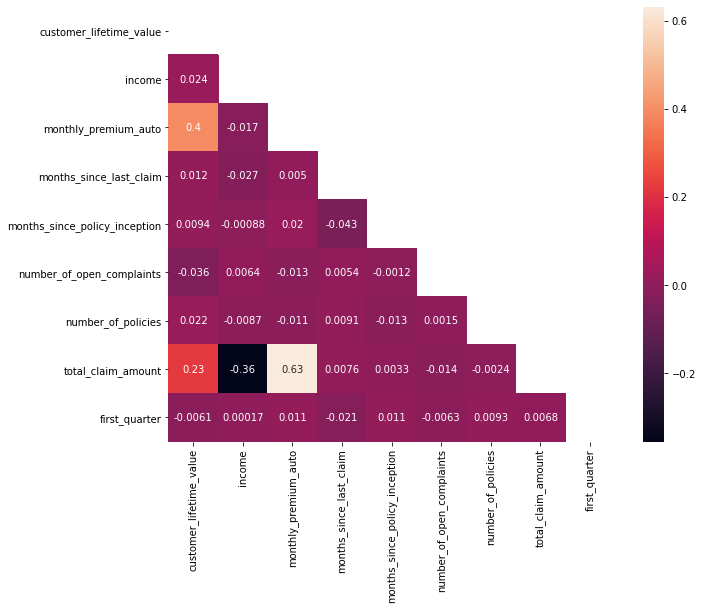

In [31]:
mask = np.zeros_like(N_file.corr())
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(N_file.corr(), mask=mask, annot=True)
plt.show()

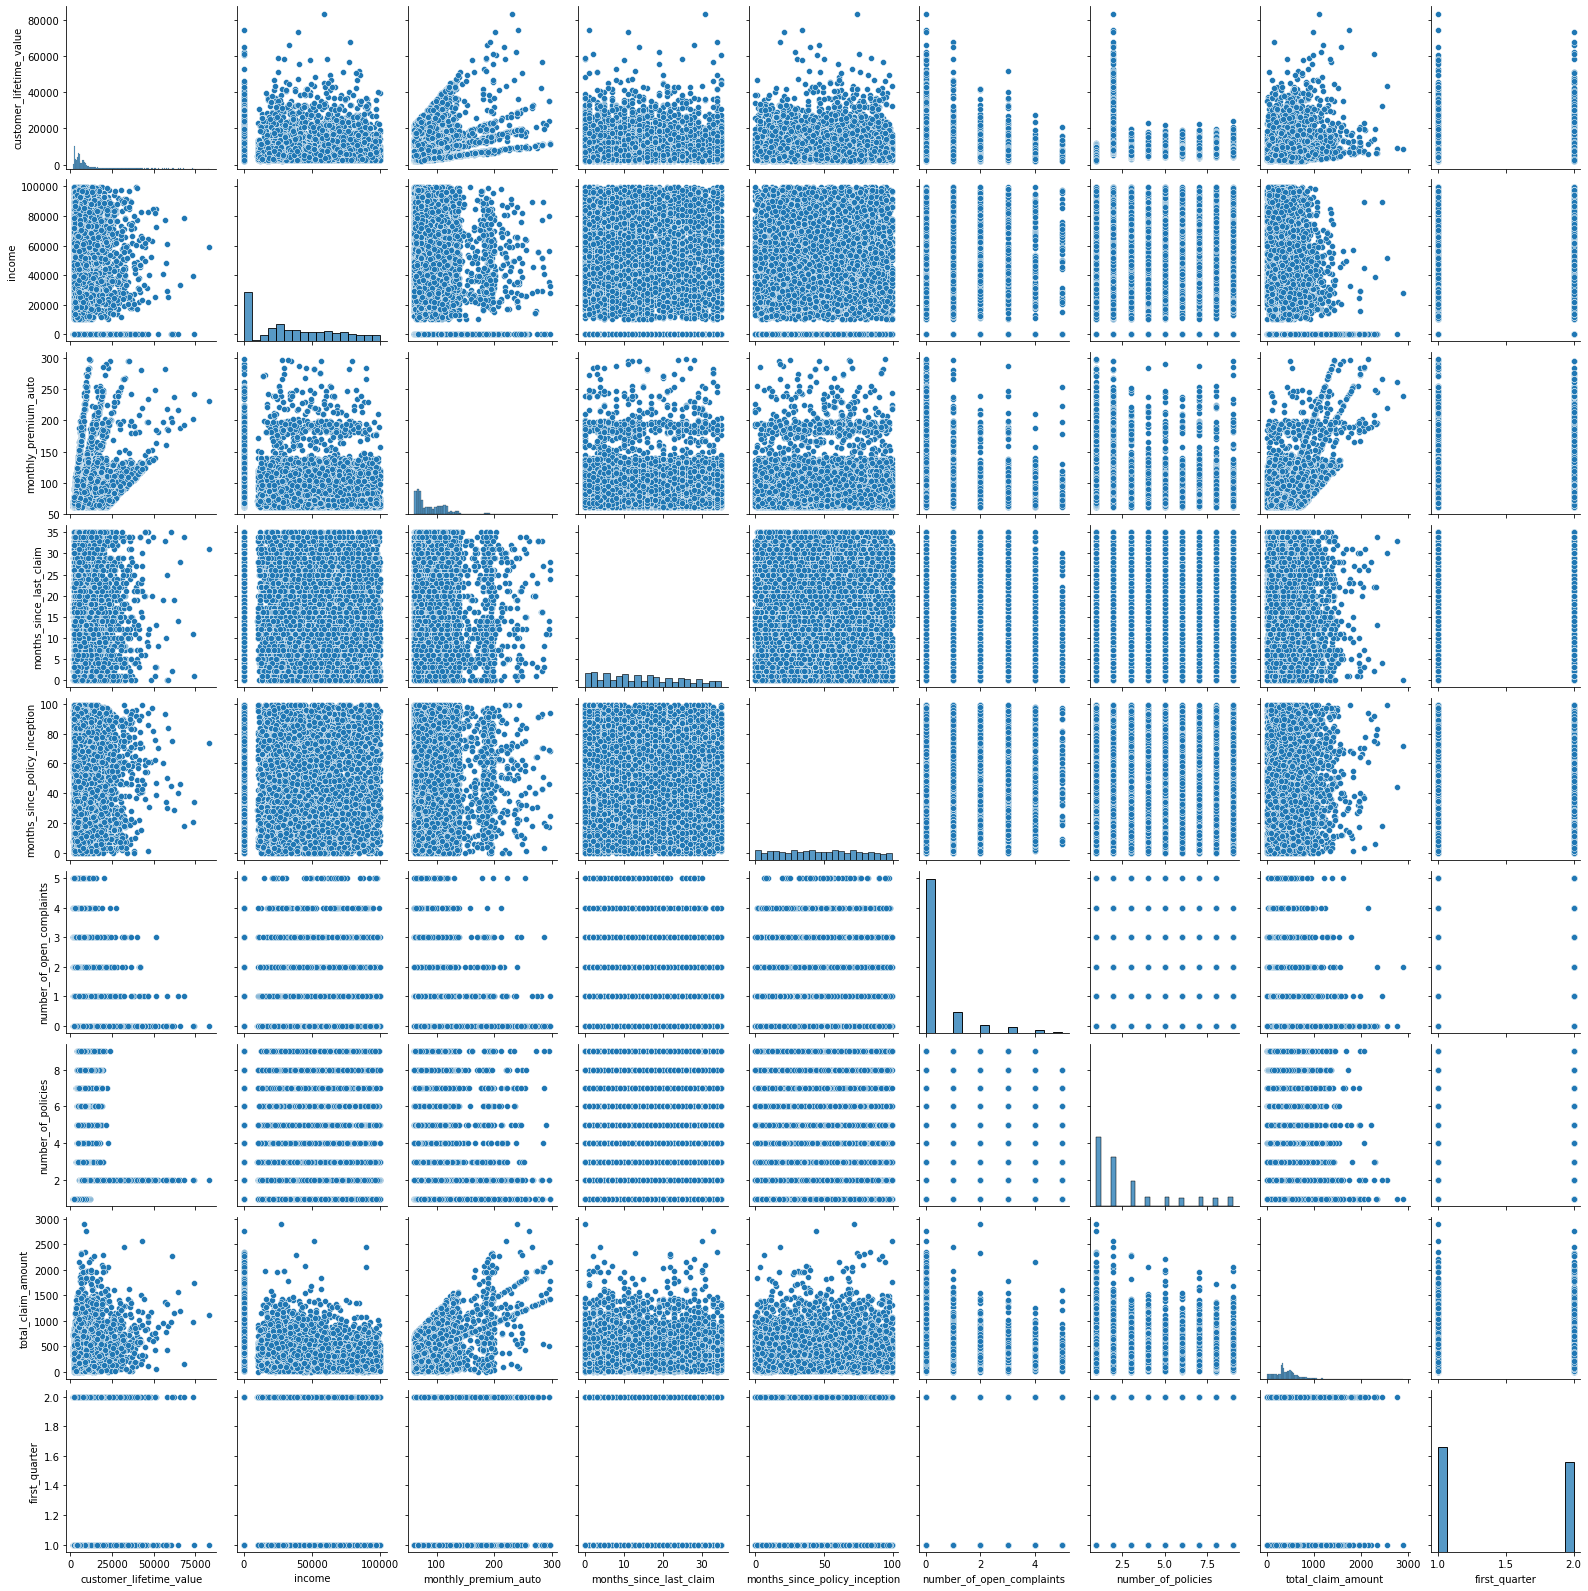

In [32]:
sns.pairplot(N_file)

In [33]:
def boxcox_transform(N_file):
    numeric_cols = N_file.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        N_file[column] = np.where(N_file[column]<=0, np.NAN, N_file[column]) 
        N_file[column] = N_file[column].fillna(N_file[column].mean())
        transformed_data, ci = stats.boxcox(N_file[column])
        N_file[column] = transformed_data
        _ci[column] = [ci] 
    return N_file, _ci
N_file, _ci = boxcox_transform(N_file)
N_file.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
0,2.703839,1247.937066,0.685347,10.876059,3.017887,0.648045,0.000000,33.035752,0.561741
1,2.754926,1167.961720,0.685871,5.808248,18.780377,0.648045,1.424359,56.357614,0.000000
2,2.780772,1144.063081,0.686039,7.347815,17.389171,0.648045,0.607328,40.071789,0.561741
3,2.759125,1167.961720,0.686018,7.347815,26.160800,0.648045,1.363462,38.763252,0.000000
4,2.704995,1072.375744,0.685461,5.471294,19.461641,0.648045,0.000000,19.560154,0.561741


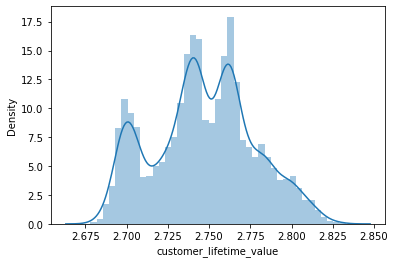

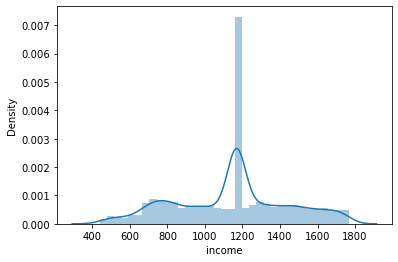

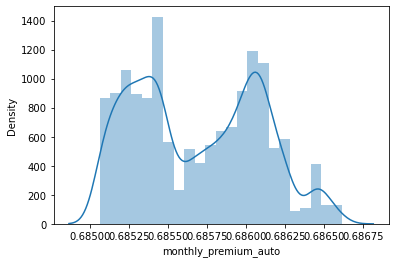

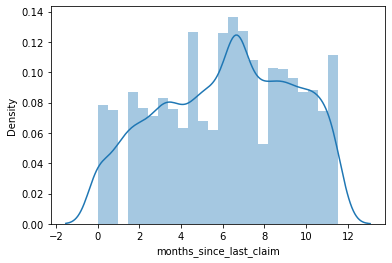

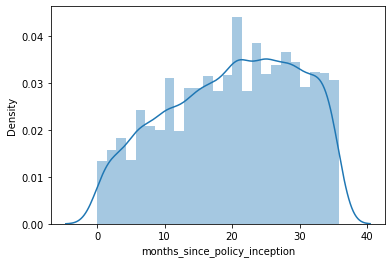

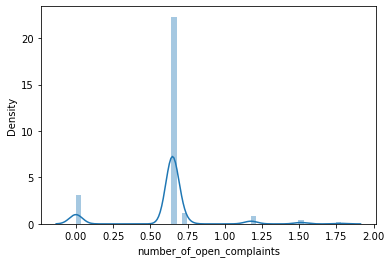

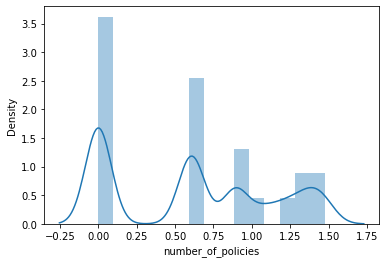

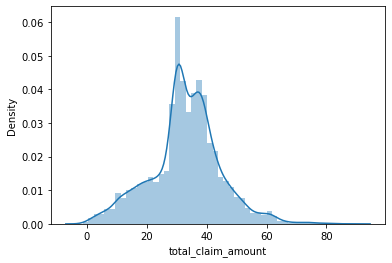

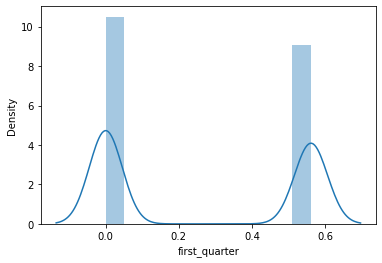

In [34]:
for column in N_file.columns:
    sns.distplot(N_file[column])
    plt.show()

In [35]:
def remove_outliers(N_file, threshold=1.5, in_columns=N_file.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(N_file[column],75)
            lower = np.percentile(N_file[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            N_File = N_File[(N_file[column]>lower_limit) & (N_file[column]<upper_limit)]
    return N_file

In [36]:
transformer = MinMaxScaler().fit(N_file)
x_minmax = transformer.transform(N_file)
print(x_minmax.shape)

(9134, 9)


In [37]:
N_file = pd.DataFrame(x_minmax,columns=N_file.columns)
N_file.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter
0,0.167033,0.608692,0.182364,0.942696,0.084267,0.364197,0.000000,0.381196,1.0
1,0.497030,0.548600,0.518717,0.503437,0.524397,0.364197,0.965338,0.639306,0.0
2,0.663983,0.530643,0.626985,0.636881,0.485551,0.364197,0.411608,0.459066,1.0
3,0.524149,0.548600,0.613651,0.636881,0.730478,0.364197,0.924066,0.444584,0.0
4,0.174501,0.476779,0.255460,0.474231,0.543420,0.364197,0.000000,0.232057,1.0


In [38]:
O_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          9134 non-null   object
 1   state             9134 non-null   object
 2   response          9134 non-null   object
 3   coverage          9134 non-null   object
 4   education         9134 non-null   object
 5   employmentstatus  9134 non-null   object
 6   gender            9134 non-null   object
 7   location_code     9134 non-null   object
 8   marital_status    9134 non-null   object
 9   policy_type       9134 non-null   object
 10  policy            9134 non-null   object
 11  renew_offer_type  9134 non-null   object
 12  sales_channel     9134 non-null   object
 13  vehicle_class     9134 non-null   object
 14  vehicle_size      9134 non-null   object
dtypes: object(15)
memory usage: 1.0+ MB


In [39]:
O_file = O_file.drop(['customer', 'renew_offer_type', 'vehicle_class', 'vehicle_size','policy','policy_type','sales_channel','state','marital_status', 'employmentstatus', 'education', 'response', 'coverage'], axis=1)

In [40]:
O_file = pd.get_dummies(O_file, drop_first=True)
O_file

,gender_M,location_code_Suburban,location_code_Urban
0,0,1,0
1,0,1,0
2,0,1,0
3,1,1,0
4,1,0,0
...,...,...,...
9129,1,0,1
9130,0,1,0
9131,1,1,0
9132,1,1,0


In [41]:
T_file = pd.concat([N_file, O_file], axis=1)
T_file.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,first_quarter,gender_M,location_code_Suburban,location_code_Urban
0,0.167033,0.608692,0.182364,0.942696,0.084267,0.364197,0.000000,0.381196,1.0,0,1,0
1,0.497030,0.548600,0.518717,0.503437,0.524397,0.364197,0.965338,0.639306,0.0,0,1,0
2,0.663983,0.530643,0.626985,0.636881,0.485551,0.364197,0.411608,0.459066,1.0,0,1,0
3,0.524149,0.548600,0.613651,0.636881,0.730478,0.364197,0.924066,0.444584,0.0,1,1,0
4,0.174501,0.476779,0.255460,0.474231,0.543420,0.364197,0.000000,0.232057,1.0,1,0,0


In [42]:
y = T_file["total_claim_amount"]
X = T_file.drop(['total_claim_amount'], axis=1)
X.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,first_quarter,gender_M,location_code_Suburban,location_code_Urban
0,0.167033,0.608692,0.182364,0.942696,0.084267,0.364197,0.000000,1.0,0,1,0
1,0.497030,0.548600,0.518717,0.503437,0.524397,0.364197,0.965338,0.0,0,1,0
2,0.663983,0.530643,0.626985,0.636881,0.485551,0.364197,0.411608,1.0,0,1,0
3,0.524149,0.548600,0.613651,0.636881,0.730478,0.364197,0.924066,0.0,1,1,0
4,0.174501,0.476779,0.255460,0.474231,0.543420,0.364197,0.000000,1.0,1,0,0


In [43]:
len(X)

9134

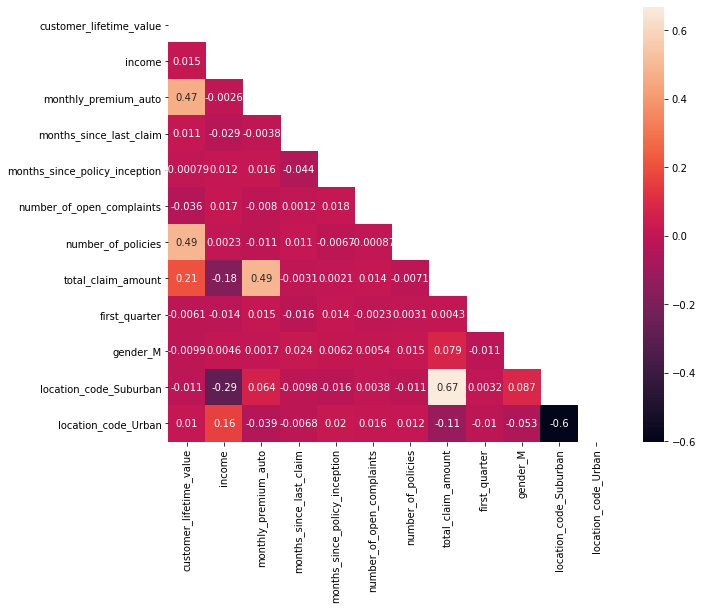

In [44]:
mask = np.zeros_like(T_file.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(T_file.corr(), mask=mask, annot=True)
plt.show()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [46]:
model= LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
len(X_train)

6393

In [48]:
predictions = model.predict(X_test)
predictions.shape

(2741,)

In [49]:
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("r2 = ", r2)
print("RMSE = ", RMSE)
print("MSE = ", MSE)
print("MAE =", MAE)

r2 =  0.7688799289255093
RMSE =  0.06292026421837506
MSE =  0.003958959649310129
MAE = 0.04822229748863273
